<a href="https://colab.research.google.com/github/LucaBarco/TesinaDataSpaces/blob/main/Tesina_s276072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
# scientific computing libaries
import pandas as pd
import numpy as np
from sklearn import preprocessing
#plots
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

# data mining libaries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA#, FastICA
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix

from imblearn.pipeline import make_pipeline, Pipeline

from imblearn.over_sampling import SMOTE

SEED=37

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# Loading dataset

The cardiovascular diseases are one of the most frequent causes of death.  They mainly causes heart failures: the hearthcannot pump enough blood to satisfy the needs of the body.  Nowadays, the electronic medical records can help in findingcorrelations between symptoms and body values, and applying machine learning algorithms can help to predict the patient’ssurvival and to highlight the most important features to take in consideration.This tesina is based on the dataset used in the work of Chicco and Jurman  [1] "Machine learning can predict survival ofpatients with heart failure from serum creatinine and ejection fraction alone".

The dataset contains the medical records of 299 patients with an hearth failure gathered in Pakistan during 2015. 
The dataset contains 13 features which report clinical, body and lifestyle data:

- *age*: age of the patient (years)
- *anaemia*: decrease of red blood cells or hemoglobin (boolean)
- *high_blood_pressure*: if the patient has hypertension (boolean)
- *creatinine_phosphokinase* (CPK): level of the CPK enzyme in the blood (mcg/L)
- *diabetes*: if the patient has diabetes (boolean)
- *ejection_fraction*: percentage of blood leaving the heart at each contraction (percentage)
- *platelets*: platelets in the blood (kiloplatelets/mL)
- *sex*: woman or man (binary)
- *serum_creatinine*: level of serum creatinine in the blood (mg/dL)
- *serum_sodium*: level of serum sodium in the blood (mEq/L)
- *smoking*: if the patient smokes or not (boolean)
- *time*: follow-up period (days)
- ***death_event***: if the patient deceased during the follow-up period (boolean)

In [ ]:
# Clone github repository with dataset
! rm -r 'TesinaDataSpaces'
if not os.path.isdir('./TesinaDataSpaces'):
  !git clone https://github.com/LucaBarco/TesinaDataSpaces

datasetPath='./TesinaDataSpaces/Dataset/heart_failure_clinical_records_dataset.csv'

ds = pd.read_csv(datasetPath)

print("The dataset has %d rows and %d columns." % ds.shape)

#Check for null values
print("Checking for null values....", end="")
print(("SOME" if ds.isnull().values.any() else "NO")  + " null/missing values.")

#Show the first rows
print("\nFirst 5 rows:")
ds.head(5)

rm: cannot remove 'TesinaDataSpaces': No such file or directory
Cloning into 'TesinaDataSpaces'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 0), reused 21 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
The dataset has 299 rows and 13 columns.
Checking for null values....NO null/missing values.

First 5 rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Let's have a look to the description of the features given by the function describe() of pandas

In [ ]:
ds.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


We can see that there are a lot of boolean features for which these statistics have not much sense (anaemia, diabetes, sex, smoking).
There are, instead, features with interesting properites.

In [ ]:
#divide the dataset in 2 sub datasets: one containing death events and one other containing no death events

death = ds[ds["DEATH_EVENT"] == 1]
no_death = ds[ds["DEATH_EVENT"] == 0]

colors = plotly.colors.DEFAULT_PLOTLY_COLORS

##Features: charts and box plots

Let's see the charts of death events considering all features:


In [ ]:
def add_trace(fig, col, visible=False):
  fig.add_trace(go.Histogram(
        x=death[col],
        name='death',
        marker = dict(color = colors[3]),
        visible=visible))

  fig.add_trace(go.Histogram(
        x=no_death[col],
        name='no death',
        marker = dict(color = colors[2]),
        visible = visible))

#If you want dropdown or not set this flag
dropdown=True

fig2 = go.Figure()

excluded_features = ["DEATH_EVENT"]
features_for_charts = [x for x in ds.columns if x not in excluded_features]

menulist=[]

for feat,i  in zip(features_for_charts, range(len(features_for_charts))):
  add_trace(fig2, feat, True if feat == "age" else False)
  flagList=[False]*(2*i)+[True]*2+[False]*(2*(len(features_for_charts)-i+1))
  menulist.append(
      dict(label=feat,
          method="update",
          args=[{"visible": flagList
                }, {"title":feat}
                ]))

fig2.update_layout(updatemenus=[
                               dict(active=0,
                                    buttons=menulist,
                                    type ="dropdown" if dropdown else "buttons", 
                                    direction="down" if dropdown else "left", 
                                    pad={"r": 8, "t": 8},
                                    showactive=True,
                                    x=0.5 if dropdown else 0, 
                                    xanchor="left",
                                    y=1.15,
                                    yanchor="top")])

fig2.update_layout(title_text=features_for_charts[0], font=dict(size=18))
fig2.show()

To well compare the datta distributions we have to draw the box plots. 
A box plot is a plot that helps in visualizing the data distributions.
It shows:
- the *median* of the data: it's shown by the line that divides the box in two parts.
- the *lower quartile* (Q1, the 25% of the data fall below this value) and the *upper quartile* (Q3,   the 75% of the data fall below this value), and they are used to compute the *interquartile range* IRQ.
- the *lower fence*: Q1-1.5*IQR
- the *upper fence*: Q3+1.5*IQR
- the *outliers*: the values that appear out of the lower and upper fences

This plot can help us in understanding how the data are distributed, if they are dispersed, if the distribution is symmetrical and so on.

In [ ]:
onlyBox=True
exclude_binaries=True

In [ ]:
def add_box_trace(fig, col, visible=False):
    fig.add_trace(go.Box(
          y=death[col],
          name='death',
          marker = dict(color = colors[3]),
          visible=visible))

    fig.add_trace(go.Box(
          y=no_death[col],
          name='no death',
          marker = dict(color = colors[2]),
          visible = visible))


def add_2_trace(fig, col, visible=False):
    fig.add_trace(go.Histogram(
          x=death[col],
          name='death distribution',
          marker = dict(color = colors[3]),
          visible=visible), row=1, col=1)

    fig.add_trace(go.Histogram(
          x=no_death[col],
          name='no death distribution',
          marker = dict(color = colors[2]),
          visible = visible), row=1, col=1)
    fig.add_trace(go.Box(
          y=death[col],
          name='death box',
          marker = dict(color = colors[3]),
          visible=visible), row=2, col=1)

    fig.add_trace(go.Box(
          y=no_death[col],
          name='no death box',
          marker = dict(color = colors[2]),
          visible = visible), row=2, col=1)
    

if onlyBox:
  
  #If you want dropdown or not set this flag
  dropdown=True

  fig3 = go.Figure()
  #remove binary features: for them the box plots are not significantly meaningful
  excluded_features = ["DEATH_EVENT"]
  if exclude_binaries:
    for feat in ds.columns:
      if len(ds[feat].unique()) < 5 and feat not in excluded_features:
        excluded_features.append(feat)
  print("Excluded features: ")
  print(excluded_features)
  features_for_charts = [x for x in ds.columns if x not in excluded_features]


  menulist=[]
  for feat,i  in zip(features_for_charts, range(len(features_for_charts))):
    add_box_trace(fig3, feat, True if feat == "age" else False)
    flagList=[False]*(2*i)+[True]*2+[False]*(2*(len(features_for_charts)-i+1))
    menulist.append(
        dict(label=feat,
            method="update",
            args=[{"visible": flagList
                  }, {"title":feat}
                  ]))

  fig3.update_layout(updatemenus=[
                                dict(active=0,
                                      buttons=menulist,
                                      type ="dropdown" if dropdown else "buttons", 
                                      direction="down" if dropdown else "left", 
                                      pad={"r": 8, "t": 8},
                                      showactive=True,
                                      x=0.5 if dropdown else 0, 
                                      xanchor="left",
                                      y=1.15,
                                      yanchor="top")])

  fig3.update_layout(title_text=features_for_charts[0], font=dict(size=18))
  fig3.show()

else:
    
  #If you want dropdown or not set this flag
  dropdown=True

  fig4 = make_subplots(rows=2, cols=1, start_cell="top-left",  subplot_titles=("Distribution", "Box plot"))

  #remove binary features: for them the box plots are not significantly meaningful
  excluded_features = ["DEATH_EVENT"]
  if exclude_binaries:
    for feat in ds.columns:
      if len(ds[feat].unique()) < 5 and feat not in excluded_features:
        excluded_features.append(feat)
  print("Excluded features: ")
  print(excluded_features)
  features_for_charts = [x for x in ds.columns if x not in excluded_features]


  menulist=[]
  for feat,i  in zip(features_for_charts, range(len(features_for_charts))):
    add_2_trace(fig4, feat, True if feat == "age" else False)
    flagList=[False]*(4*i)+[True]*4+[False]*(4*(len(features_for_charts)-i+1))
    menulist.append(
        dict(label=feat,
            method="update",
            args=[{"visible": flagList
                  }, {"title":feat}
                  ]))

  fig4.update_layout(updatemenus=[
                                dict(active=0,
                                      buttons=menulist,
                                      type ="dropdown" if dropdown else "buttons", 
                                      direction="down" if dropdown else "left", 
                                      pad={"r": 8, "t": 8},
                                      showactive=True,
                                      x=0.5 if dropdown else 0, 
                                      xanchor="left",
                                      y=1.15,
                                      yanchor="top")])

  fig4.update_layout(height=900, title_text=features_for_charts[0], font=dict(size=18))
  fig4.show()


Excluded features: 
['DEATH_EVENT', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


*Guidelines for comparing boxplots*
- Compare the respective medians, to compare location.

- Compare the interquartile ranges (that is, the box lengths), to compare dispersion.

- Look at the overall spread as shown by the adjacent values. (This is another aspect of dispersion.)

- Look for signs of skewness. If the data do not appear to be symmetric, does each batch show the same kind of asymmetry?

- Look for potential outliers. Considering the figures we can se some outliers in the values of the features.
Outliers are a data object that deviates significantly from the rest of the objects, are
extreme values and can have different origins.We can have different kind of outliers
considering their nature: point outliers, contextual outliers, or collective outliers. Point
outliers are single data points that are far from the rest of the distribution; contextual outliers can be noise in data; collective outliers can be subsets of novelties in data such as a signal that may indicate the discovery of new phenomena.If we can lead back the nature
of the outliers to the first kind we can decide to keep them because they can potentially keep a lot of informations.

After discussing these features, general conclusions should be summarized briefly.

### Plots comparisons
### Age
- Mean: similar (65 vs 50)
- Interquartile ranges/ Box length: similar (20 vs 15)
- Spread/adjacent values: similar behaviour
- Symmetry: death box is symmetrical, the no death no. 
- Potential outliers: some in no death
The two distributions are similar. There is more dispersion in death data.

### Creatinine phosphokinase
- Mean: similar (259 vs 245)
- Interquartile ranges/ Box length: similar 
- Spread/adjacent values: similar behaviour
- Symmetry: both are asymmetrical 
- Potential outliers: too much
Too much outliers to say something meaningful.

### Ejection fraction
- Mean: 30 vs 38
- Interquartile ranges/ Box length: similar (13 vs 10)
- Spread/adjacent values: similar behaviour
- Symmetry: both asymmetrical, more unbalancing in the no death box. 
- Potential outliers: both; more in death box
Similar distributions but they are centered in different points.

### Platelets
- Mean: similar (259k vs 263k)
- Interquartile ranges/ Box length: no death double length than death
- Spread/adjacent values: similar behaviour
- Symmetry: similar, symmetrical 
- Potential outliers: both; more in no death box
Similar distributions, with some outliers.

### Serum creatinine
- Mean: similar (1.3 vs 1)
- Interquartile ranges/ Box length: 1 vs 0.3, more dispersion in death 
- Spread/adjacent values: death has more dispersion
- Symmetry: both are asymmetrical 
- Potential outliers: both, more in death
More dispersion in death box and more outliers.


### Serum sodium
- Mean: similar (135 vs 138)
- Interquartile ranges/ Box length: similar, 5 in both  
- Spread/adjacent values: death has more dispersion
- Symmetry: death is symmetrical, no death is asymmetrical 
- Potential outliers: both, more in no death
Similar distributions.

### Time
- Mean: (44 vs 173)
- Interquartile ranges/ Box length: 80 vs 118, more dispersion in no death 
- Spread/adjacent values: death has more dispersion
- Symmetry: both are asymmetrical in a dual way
- Potential outliers: death
Very different distributions: different means, opposite symmetry. For sure it will be a very important feature in order to do a prediction.

Looking to these charts, we can see that:
- *age*: the death and no death trends have similar-gaussian behaviours.
We can see that for different ages there are more death events rather than the no death events: the older the patients, the higher the probability to have a death event. In particular, the proportion between death events and no death events is reversing after an age of 70. So, it means that the age is an important feature for our analysis.
- *anaemia*: The proportion of death/no death with respect to the presence or absence of anaemia is almost the same. (abs: 30% vs 70%, pres: 35% vs 65%)
- *creatinine_phosphokinase*: both the death and no death trends are similar to an half of a Gaussian centered in the origin. The most of the deaths happen in the range 0-600.
- *diabetes*: the proportion is almost the same between diabetes and not diabetes. There are more deaths for patients wihout diabetes.
- *ejection_fraction*: the death and no death are similar to gaussians. 
- *high_blood_pressure*: same proportions of diabetes. 
- *platelets*: death and no death trends are both similar to a gaussian.
- *serum_creatinine*: eath and no death trends are both similar to a gaussian, but there is not all the gaussian in the chart.
- *serum_sodium*: the death and no death are similar to gaussians but not centerd at the same mean value. 
- *sex*: men have more heart failure than women. Considering the sex alone, the proportions are the same between death and no death for men and women.
-  *smoking*: more death events for no smoking patients
- *time*: most of the people die in the first follow up period. This feature probably is not useful for our analysis, since it can cause a bias in our model.


## Correlation

To have a better idea of the pair-wise correlations between features, we compute the correlation matrix. To measure the correlation we use the 

Pearson correlation = cov(X,V)/stdev(X)stdev(Y)

In [ ]:
correlation=ds.corr()

fig5 = go.Figure(data=go.Heatmap(z=correlation.values.tolist(), x=correlation.columns, y=correlation.columns))

fig5.update_layout(title='Heatmap of pairwise correlation',
    autosize=False,
    width=850,
    height=700,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=40),
    margin=go.layout.Margin(l=0, r=200, b=200, t=80))

fig5.show()

Looking at this correlation matrix (represented as an heatmap) we can see that the only meaningful correlation is the one between death events and time (it's actually a negative correlation), as we could expect from the plots already seen.

There is a slight positive correlation between sex and smoking but it is not so helpful for our task.

In general, the features seems highly scorrelated from each other. Probably the application of the PCA will be useless.



## Data preprocessing

Since we have features with different scales, we need to perform a normalization. We chooose to perform the min-max normalization and the Z-Score because it's more roboust for outliers.

In [ ]:
#zero centering
centered_ds=ds.subtract(ds.mean())

#normalization

#min-max
normalized_ds=(centered_ds - centered_ds.min())/(centered_ds.max()-centered_ds.min())
#z-score
zscore_ds = (centered_ds - centered_ds.mean())/centered_ds.std()


ds_Y = ds["DEATH_EVENT"]
ds_X = ds.drop(["DEATH_EVENT"],axis=1)

ds_X_norm=(ds_X-ds_X.mean())/ds_X.std()

# Splitting dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ds_X_norm, ds_Y, test_size=0.2, random_state=SEED)
#without time feature
X_train_dropped=X_train.drop(["time"], axis=1)
X_test_dropped=X_test.drop(["time"], axis=1)
print(X_train)
print(X_train_dropped)

          age   anaemia  creatinine_phosphokinase  ...       sex   smoking      time
175 -0.070106  1.146046                 -0.501747  ...  0.734457  1.451727  0.202787
72   2.031652 -0.869647                  5.462462  ...  0.734457  1.451727 -0.750647
2    0.350246 -0.869647                 -0.449186  ...  0.734457  1.451727 -1.588122
194 -1.331160 -0.869647                  0.000165  ...  0.734457 -0.686531  0.640851
156 -0.742668  1.146046                 -0.539880  ... -1.356997 -0.686531 -0.132203
..        ...       ...                       ...  ...       ...       ...       ...
42   0.770597 -0.869647                 -0.011171  ...  0.734457  1.451727 -1.253132
163 -0.910808  1.146046                  1.805815  ... -1.356997 -0.686531 -0.054898
122 -0.070106 -0.869647                 -0.500717  ... -1.356997 -0.686531 -0.454309
22   0.602457  1.146046                 -0.372920  ...  0.734457  1.451727 -1.420627
251 -0.490457 -0.869647                 -0.010141  ... -1.356997 

# Principal Component Analysis (PCA)

PCA is a technique used to represent data living in a d-dimensional space onto a k-dimensional space, where k < d.
PCA does it keeping the same variance of the original data because the direction of largest variance is given by the eigenvector corresponding to the largest eigenvalue of the matrix E (that is the covariance matrix that contains, for each entry ij, cov(xi,xj).
In this way we can obtain the Principal Components. They are able to explain by themselves a certain amount of the total variance of the data: the value of the eigenvaue represents a measure of the variance along the direction given by its relative eigenvector. In this way we can consider the directions where the scatter is the highest.

To do PCA, we have to do the following steps:
- standardize the data
- compute the covariance matrix/scatter matrix and its eigenvalues and eigenvectors or use SVD (the actual technique used here)
- sort the eigenvalues in a descending order
- put the top k eigenvectors into the columns of a matrix nxk W (projection matrix)
- Transform the dataset using the matrix multiplication X'=XW

Let's have a general look to the dataset and see if it can be useful to try to reduce the dimensionality

In [ ]:
#uncomment to delete time dimension
#ds_X_norm.__delitem__('time')

pca = PCA(random_state=SEED)
#df_X_pca=pca.fit(ds_X_norm)
ds_X_pca=pca.fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
total_variance = sum(pca.explained_variance_)
individual_variance=[(j/total_variance) * 100 for j in sorted(pca.explained_variance_, reverse=True)]
cumulative_variance=np.cumsum(individual_variance)


In [ ]:
fig_pca=go.Figure()
fig_pca.add_trace(go.Bar(
    x=list(range(1, len(cumulative_variance)+1)),
    y=individual_variance,
    name="individual explained variance"
))
fig_pca.add_trace(go.Scatter(
    x=list(range(1, len(cumulative_variance)+1)),
    y=cumulative_variance,
    name="cumulative explained variance",
    line=dict(shape='hv')
))

layout = go.Layout(
    title='Individual and Cumulative Explained Variance',
    autosize=True,
    yaxis=dict(
        title='percentage of explained variance',
    ),
    xaxis=dict(
        title="principal components",
        dtick=1,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig_pca.update_layout(layout)
fig_pca.show()

In this particular case, we can see that the PCA is not too useful for our tasks, because apparentely there is not a more important PC with respect to others. In particular the first two PCs describe a similar percentage of variance, and the others a slight lower ercentage but there are no significant differences. 

Anyway, we can decide to keep only the first 9 PCs that describes the 85% of the total variance, removing 3 dimensions.

We can also plot the biplot to understand which features affect the first two PCs, using 

loadings = eigenvectors * sqrt(eigenvalues)

In [ ]:
bip_y = Y_train.astype(str)
fig_biplot=px.scatter(X_train_pca, x=0, y=1, color=bip_y)

# loadings = eigenvectors * sqrt(eigenvalues)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, feature in enumerate(ds_X.columns):
    fig_biplot.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig_biplot.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig_biplot.show()

From this chart we can see that PC2 is mainly affected by smoking and sex, that are positive correlated, and by ejection fraction that is negatively correlated with respect to them. PC1 is mainly affected by the time feature, and it has also a negative correlation with respect to age and serum_creatine.



In [ ]:
n_components=9
ds_X_reduced = np.dot(ds_X_norm.values, pca.components_[:n_components,:].T)
ds_X_reduced = pd.DataFrame(ds_X_reduced, columns=["PC#%d" % (x+1) for x in range(n_components)])

# Classification

First of all, we have to decide a measure to compare the results.

We can use the accuracy = (TP+TN)/(TP+TN+FP+FN) if the classes are not too unbalanced,
otherwise we can use the F1-SCORE = 2 * (PRECISION \* RECALL)/(PRECISION + RECALL)
where PRECISION=TP/(TP+FP) and RECALL=TP/(TP+FN)

To check the balance,  let's plot the target variable considering the entire dataset



In [ ]:
kfold = StratifiedKFold(n_splits=5)

In [ ]:
fig_balance=go.Figure()
y=ds["DEATH_EVENT"].value_counts()
print(y)
fig_balance.add_trace(go.Bar(x=["no death", "death"], y=y.values,marker = dict(color = [colors[2], colors[3]])))
layout = go.Layout(
    title='Death events distribution',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='#samples',
    ),
)
fig_balance.update_layout(layout)
fig_balance.show()

0    203
1     96
Name: DEATH_EVENT, dtype: int64


We can see an unbalance between the two classes, so it's better to use the F1-score.

We can also try to do an undersampling of the no death class. 

In [ ]:

def sample_together(n, X, y):
    rows = random.sample(np.arange(0,len(X.index)).tolist(),n)
    return X.iloc[rows,], y.iloc[rows,]


def undersample(X, Y, under=0):
  # X: predictor DataFrame, Y: target DataFrame, under: label of minority class
  y_min=Y[Y.DEATH_EVENT==under]
  y_max=Y[Y.DEATH_EVENT!=under]
  print(len(y_min))
  print(len(y_max))
  X_min=X.filter(y_min.index, axis=0)
  X_max=X.filter(y_max.index, axis=0)
  print(len(X.index))
  X_under, y_under = sample_together(len(y_min.index), X_max, y_max)

  X=pd.concat([X_under, X_min])
  y=pd.concat([y_under, y_min])

  return X, y

ds_X_balanced, ds_Y_balanced = undersample(ds_X_norm, ds_Y.to_frame(), under=1)
ds_Y_balanced=ds_Y_balanced["DEATH_EVENT"]
X_train_balanced, X_test_balanced, Y_train_balanced, Y_test_balanced = train_test_split(ds_X_balanced, ds_Y_balanced, test_size=0.2, random_state=SEED)


96
203
299


Or an using a SMOTE approach

In [ ]:
def print_grid_search_result(grid_search, n=1):
    if not hasattr(grid_search, 'best_score_'):
        raise KeyError('grid_search is not fitted.')
    print("Best grid scores on validation set:")
    indexes = np.argsort(grid_search.cv_results_['mean_test_score'])[::-1][:n]   #get first n results
    means = grid_search.cv_results_['mean_test_score'][indexes]                  #get mean test score
    stds = grid_search.cv_results_['std_test_score'][indexes]                    #get mean standard deviation
    params = np.array(grid_search.cv_results_['params'])[indexes]                #get parameters array
    for mean, std, params in zip(means, stds, params):                           #print results
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

def print_learning_curve(estimator,train_x,train_y):
  true_color='#ff7f0e'
  not_true_color='#1f77b4'
  train_sizes,train_scores,test_scores = learning_curve(estimator=estimator,
                                                        X=train_x,y=train_y,
                                                        train_sizes=np.linspace(0.1,1.0,10)
                                                        ,cv=10,n_jobs=1)
  train_mean=np.mean(train_scores,axis=1)
  train_std=np.std(train_scores,axis=1)
  test_mean=np.mean(test_scores,axis=1)
  test_std=np.std(test_scores,axis=1)

  plt.plot(train_sizes,train_mean,
           color=not_true_color,marker='o',
           markersize=5,label='Training accuracy')
  
  plt.fill_between(train_sizes,train_mean+train_std,
            train_mean-train_std,
            alpha=0.15,color=not_true_color)
  
  plt.plot(train_sizes,test_mean,color=true_color,
           linestyle='--',marker='s',markersize=5,
           label='Validation accuracy')
    
  plt.fill_between(train_sizes,test_mean+test_std,
            test_mean-test_std,
            alpha=0.15,color=true_color)
  plt.grid()
  plt.xlabel('Number of training examples')
  plt.ylabel("Accuracy")
  plt.legend(loc='lower right')
  plt.show()


In [ ]:
sm = SMOTE(random_state=SEED)

def apply_model(clf, params, X_train, Y_train, X_test, Y_test, smote=False):
  if smote:
    print("smote")
    pipeline = Pipeline([('sm', sm), ('clf', clf)])
  else:
    pipeline = Pipeline([('clf', clf)])
  gs = GridSearchCV(pipeline, params, cv=kfold, n_jobs=-1, scoring='f1', return_train_score=True)
  gs.fit(X_train, Y_train)

  y_pred_svm = gs.predict(X_test)                                                    #uses best parameters to predict test data
  cm_lr = confusion_matrix(Y_test, y_pred_svm)   #compute confusion matrix
  cm_lr = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]                        # normalize the confusion matrix with respect to total
  cf = pd.DataFrame(cm_lr.round(3), index=["true not death", "true death"], columns=["predicted not death", "predicted death"])
  plot_confusion_matrix(gs, X_test, Y_test)  
  return gs, cf

# SVM
First classifier: SVM.

In [ ]:
SVM_PARAMS = [
{
    'clf__kernel': ['linear'],
    'clf__C': [0.1, 1, 10],
}, 
{
    'clf__kernel': ['rbf'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma': [0.01, 0.1, 1, 10, 100],
}]

SVM_PARAMS_CHECK = [
{
    'clf__kernel': ['linear'],
    'clf__C': [ 100],
}, 
{
    'clf__kernel': ['rbf'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma': [0.01, 0.1, 1, 10, 100],
}]

## Configuration 1: full dataset

Best grid scores on validation set:
0.752 (+/-0.136) for {'clf__C': 10, 'clf__kernel': 'linear'}


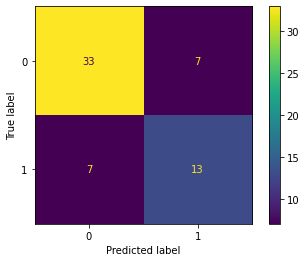

In [ ]:
gs_svm, cf =apply_model(svm.SVC(random_state=SEED, probability=True), SVM_PARAMS,X_train,Y_train,X_test,Y_test)
print_grid_search_result(gs_svm)

In [ ]:
cf

,predicted not death,predicted death
true not death,0.825,0.175
true death,0.350,0.650


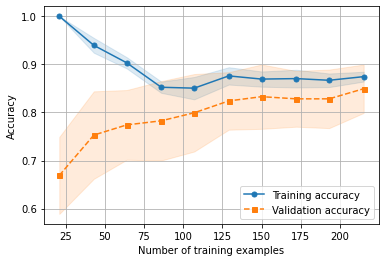

In [ ]:
print_learning_curve(gs_svm.best_estimator_,X_train, Y_train)

## Configuration 2: Reduced dataset with PCA


Best grid scores on validation set:
0.752 (+/-0.136) for {'clf__C': 10, 'clf__kernel': 'linear'}


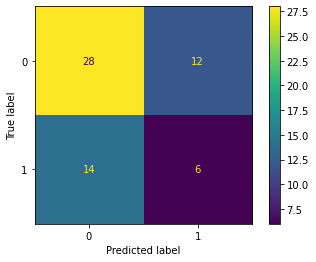

In [ ]:
gs_svm_pca, cf_pca =apply_model(svm.SVC(random_state=SEED, probability=True), SVM_PARAMS,X_train_pca,Y_train,X_test,Y_test)
print_grid_search_result(gs_svm_pca)

In [ ]:
cf_pca

,predicted not death,predicted death
true not death,0.7,0.3
true death,0.7,0.3


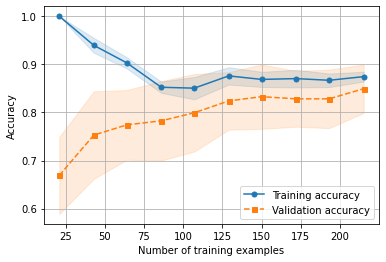

In [ ]:
print_learning_curve(gs_svm_pca.best_estimator_,X_train_pca, Y_train)

## Configuration 3: Reduced dataset with undersampling


Best grid scores on validation set:
0.780 (+/-0.113) for {'clf__C': 0.1, 'clf__kernel': 'linear'}


,predicted not death,predicted death
true not death,0.737,0.263
true death,0.450,0.550


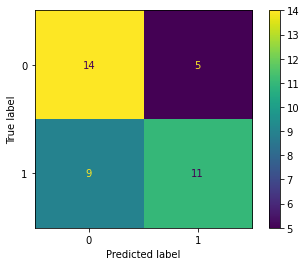

In [ ]:
gs_svm_balanced, cf_svm_balanced =apply_model(svm.SVC(random_state=SEED, probability=True), SVM_PARAMS,X_train_balanced,Y_train_balanced,X_test_balanced,Y_test_balanced)
print_grid_search_result(gs_svm_balanced)
cf_svm_balanced

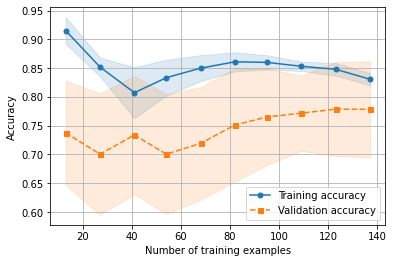

In [ ]:
print_learning_curve(gs_svm_balanced.best_estimator_,X_train_balanced, Y_train_balanced)

## Configuration 4: SMOTE

smote
Best grid scores on validation set:
0.753 (+/-0.181) for {'clf__C': 100, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



,predicted not death,predicted death
true not death,0.675,0.325
true death,0.350,0.650


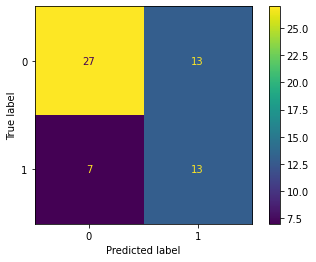

In [ ]:
gs_svm_sm, cf_svm_sm =apply_model(svm.SVC(random_state=SEED, probability=True), SVM_PARAMS,X_train,Y_train,X_test,Y_test, smote=True)
print_grid_search_result(gs_svm_sm)
cf_svm_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: Futur

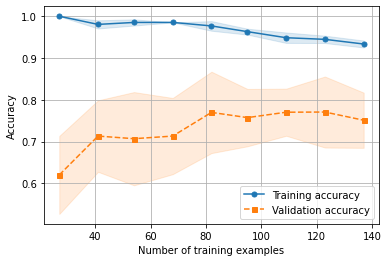

In [ ]:
print_learning_curve(gs_svm_sm.best_estimator_,X_train_balanced, Y_train_balanced)

# Logistic regression

## Configuration 1: full dataset

In [ ]:
LOGISTIC_REGRESSION_PARAMS = {
    'clf__solver': ['liblinear'],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2', 'l1']
}

Best grid scores on validation set:
0.738 (+/-0.141) for {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


,predicted not death,predicted death
true not death,0.725,0.275
true death,0.300,0.700


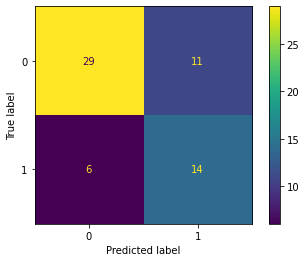

In [ ]:
gs_lr, cf_lr =apply_model(LogisticRegression(random_state=SEED, class_weight="balanced"), LOGISTIC_REGRESSION_PARAMS,X_train,Y_train,X_test,Y_test)
print_grid_search_result(gs_lr)
cf_lr

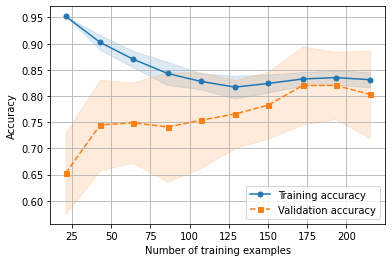

In [ ]:
print_learning_curve(gs_lr.best_estimator_,X_train, Y_train)

## Configuration 2: Reduced dataset with PCA

Best grid scores on validation set:
0.738 (+/-0.141) for {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


,predicted not death,predicted death
true not death,0.7,0.3
true death,0.3,0.7


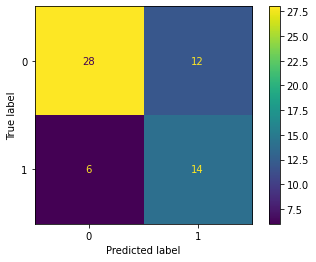

In [ ]:
gs_lr_pca, cf_lr_pca =apply_model(LogisticRegression(random_state=SEED, class_weight="balanced"), LOGISTIC_REGRESSION_PARAMS,X_train_pca,Y_train,X_test_pca,Y_test)
print_grid_search_result(gs_lr_pca)
cf_lr_pca

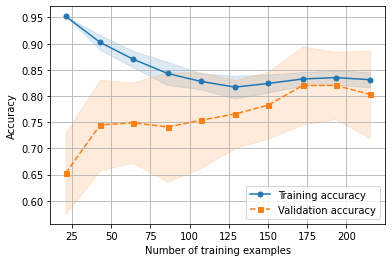

In [ ]:
print_learning_curve(gs_lr_pca.best_estimator_,X_train, Y_train)

## Configuration 3: Reduced dataset with undersampling

Best grid scores on validation set:
0.767 (+/-0.133) for {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


,predicted not death,predicted death
true not death,0.684,0.316
true death,0.350,0.650


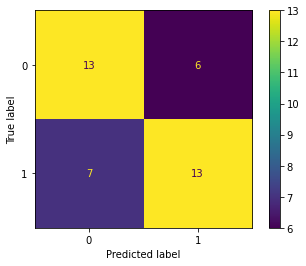

In [ ]:
gs_lr_balanced, cf_lr_balanced =apply_model(LogisticRegression(random_state=SEED, class_weight="balanced"), LOGISTIC_REGRESSION_PARAMS,X_train_balanced,Y_train_balanced,X_test_balanced,Y_test_balanced)
print_grid_search_result(gs_lr_balanced)
cf_lr_balanced

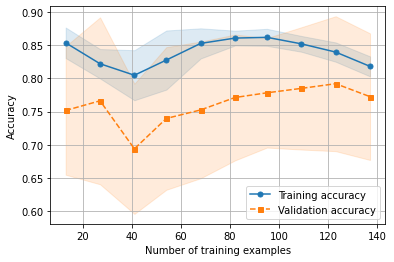

In [ ]:
print_learning_curve(gs_lr_balanced.best_estimator_,X_train_balanced, Y_train_balanced)

## Configuration 4: SMOTE

smote
Best grid scores on validation set:
0.716 (+/-0.150) for {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



,predicted not death,predicted death
true not death,0.7,0.3
true death,0.3,0.7


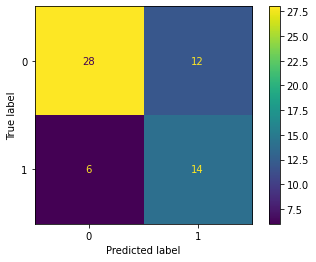

In [ ]:
gs_lr_sm, cf_lr_sm =apply_model(LogisticRegression(random_state=SEED), LOGISTIC_REGRESSION_PARAMS,X_train,Y_train,X_test,Y_test,smote=True)
print_grid_search_result(gs_lr_sm)
cf_lr_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

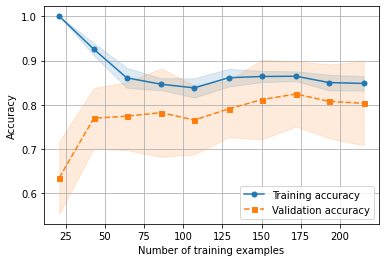

In [ ]:
print_learning_curve(gs_lr_sm.best_estimator_,X_train, Y_train)

# KNN

## Configuration 1: full dataset

In [ ]:
KNN_PARAMS = {
    'clf__n_neighbors': [5, 15, 25, 35, 45, 55, 65],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2, 10]
}
KNN_PARAMS_BAL = {
    'clf__n_neighbors': [5, 7, 9, 13],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2, 10]
}

Best grid scores on validation set:
0.474 (+/-0.210) for {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'}


,predicted not death,predicted death
true not death,0.95,0.05
true death,0.70,0.30


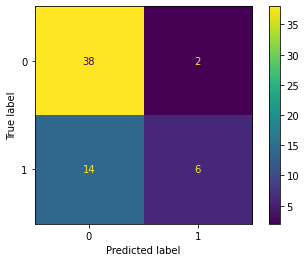

In [ ]:
gs_knn, cf_knn =apply_model(KNeighborsClassifier(), KNN_PARAMS,X_train,Y_train,X_test,Y_test)
print_grid_search_result(gs_knn)
cf_knn

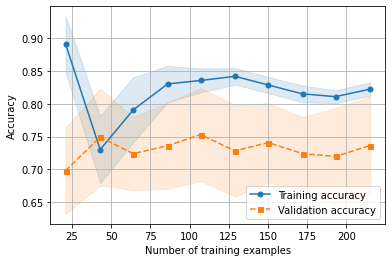

In [ ]:
print_learning_curve(gs_knn.best_estimator_,X_train, Y_train)

## Configuration 2: Reduced dataset with PCA

Best grid scores on validation set:
0.477 (+/-0.207) for {'clf__n_neighbors': 9, 'clf__p': 10, 'clf__weights': 'distance'}


,predicted not death,predicted death
true not death,0.80,0.20
true death,0.75,0.25


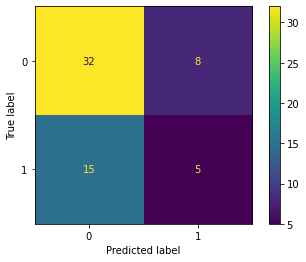

In [ ]:
gs_knn_pca, cf_knn_pca =apply_model(KNeighborsClassifier(), KNN_PARAMS_BAL,X_train_pca,Y_train,X_test,Y_test)
print_grid_search_result(gs_knn_pca)
cf_knn_pca

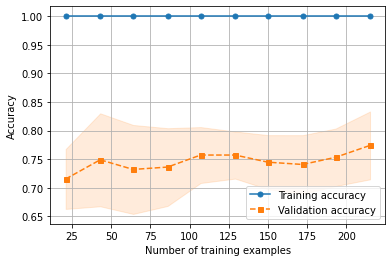

In [ ]:
print_learning_curve(gs_knn_pca.best_estimator_,X_train_pca, Y_train)

## Configuration 3: Reduced dataset with undersampling

Best grid scores on validation set:
0.745 (+/-0.185) for {'clf__n_neighbors': 9, 'clf__p': 1, 'clf__weights': 'distance'}


,predicted not death,predicted death
true not death,0.842,0.158
true death,0.350,0.650


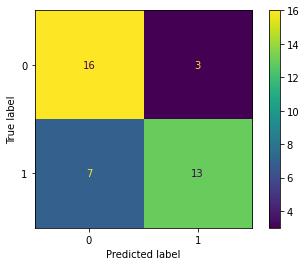

In [ ]:
gs_knn_balanced, cf_knn_balanced = apply_model(KNeighborsClassifier(), KNN_PARAMS_BAL,X_train_balanced,Y_train_balanced,X_test_balanced,Y_test_balanced)
print_grid_search_result(gs_knn_balanced)
cf_knn_balanced

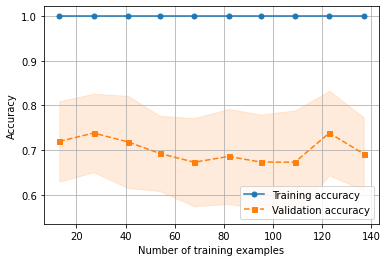

In [ ]:
print_learning_curve(gs_knn_pca.best_estimator_,X_train_balanced, Y_train_balanced)

## Configuration 4: SMOTE

smote
Best grid scores on validation set:
0.628 (+/-0.156) for {'clf__n_neighbors': 9, 'clf__p': 2, 'clf__weights': 'uniform'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



,predicted not death,predicted death
true not death,0.60,0.40
true death,0.35,0.65


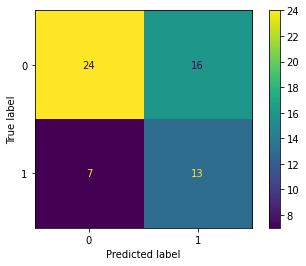

In [ ]:
gs_knn_sm, cf_knn_sm = apply_model(KNeighborsClassifier(), KNN_PARAMS_BAL,X_train,Y_train,X_test,Y_test, smote=True)
print_grid_search_result(gs_knn_sm)
cf_knn_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

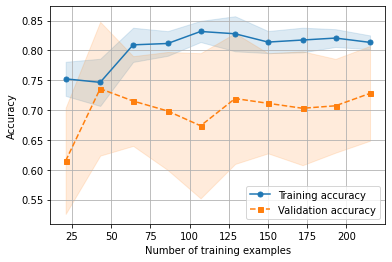

In [ ]:
print_learning_curve(gs_knn_sm.best_estimator_,X_train, Y_train)

#Decision Tree

In [ ]:
DECISION_TREE_PARAMS = {
    'clf__max_depth': [25, 50, 75],
    'clf__max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19)
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [6, 10, 14],
}

## Configuration 1: full dataset

Best grid scores on validation set:
0.674 (+/-0.316) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}


,predicted not death,predicted death
true not death,0.825,0.175
true death,0.250,0.750


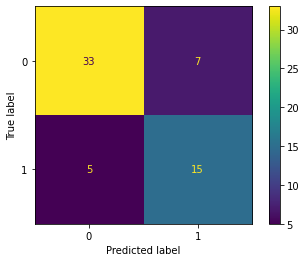

In [ ]:
gs_dt, cf_dt =apply_model(DecisionTreeClassifier(random_state=SEED, class_weight="balanced"), DECISION_TREE_PARAMS, X_train, Y_train, X_test, Y_test)
print_grid_search_result(gs_dt)
cf_dt

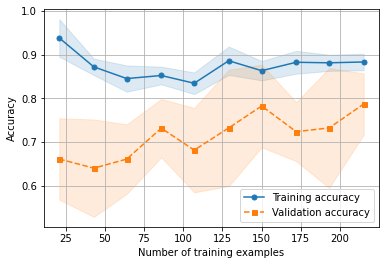

In [ ]:
print_learning_curve(gs_dt.best_estimator_,X_train, Y_train)

In [ ]:
def plot_feature_importance(feature_importance, title):
  fig_feat=go.Figure()
  fig_feat.add_trace(go.Bar(x=feature_importance[:,0],
                y=feature_importance[:,1],
                marker=dict(color=colors[0]),
                name='feature importance'
                ))
  
  fig_feat.update_layout(go.Layout(
        title=title,
        autosize=True,
        margin=go.layout.Margin(l=50, r=100, b=150),
        xaxis=dict(
            title='feature',
            tickangle=30
        ),
        yaxis=dict(
            title='feature importance',
            automargin=True,
        ),
    ),  font=dict(size=18))
  fig_feat.show()


In [ ]:
feature_importance = np.array(sorted(zip(X_train.columns, gs_dt.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

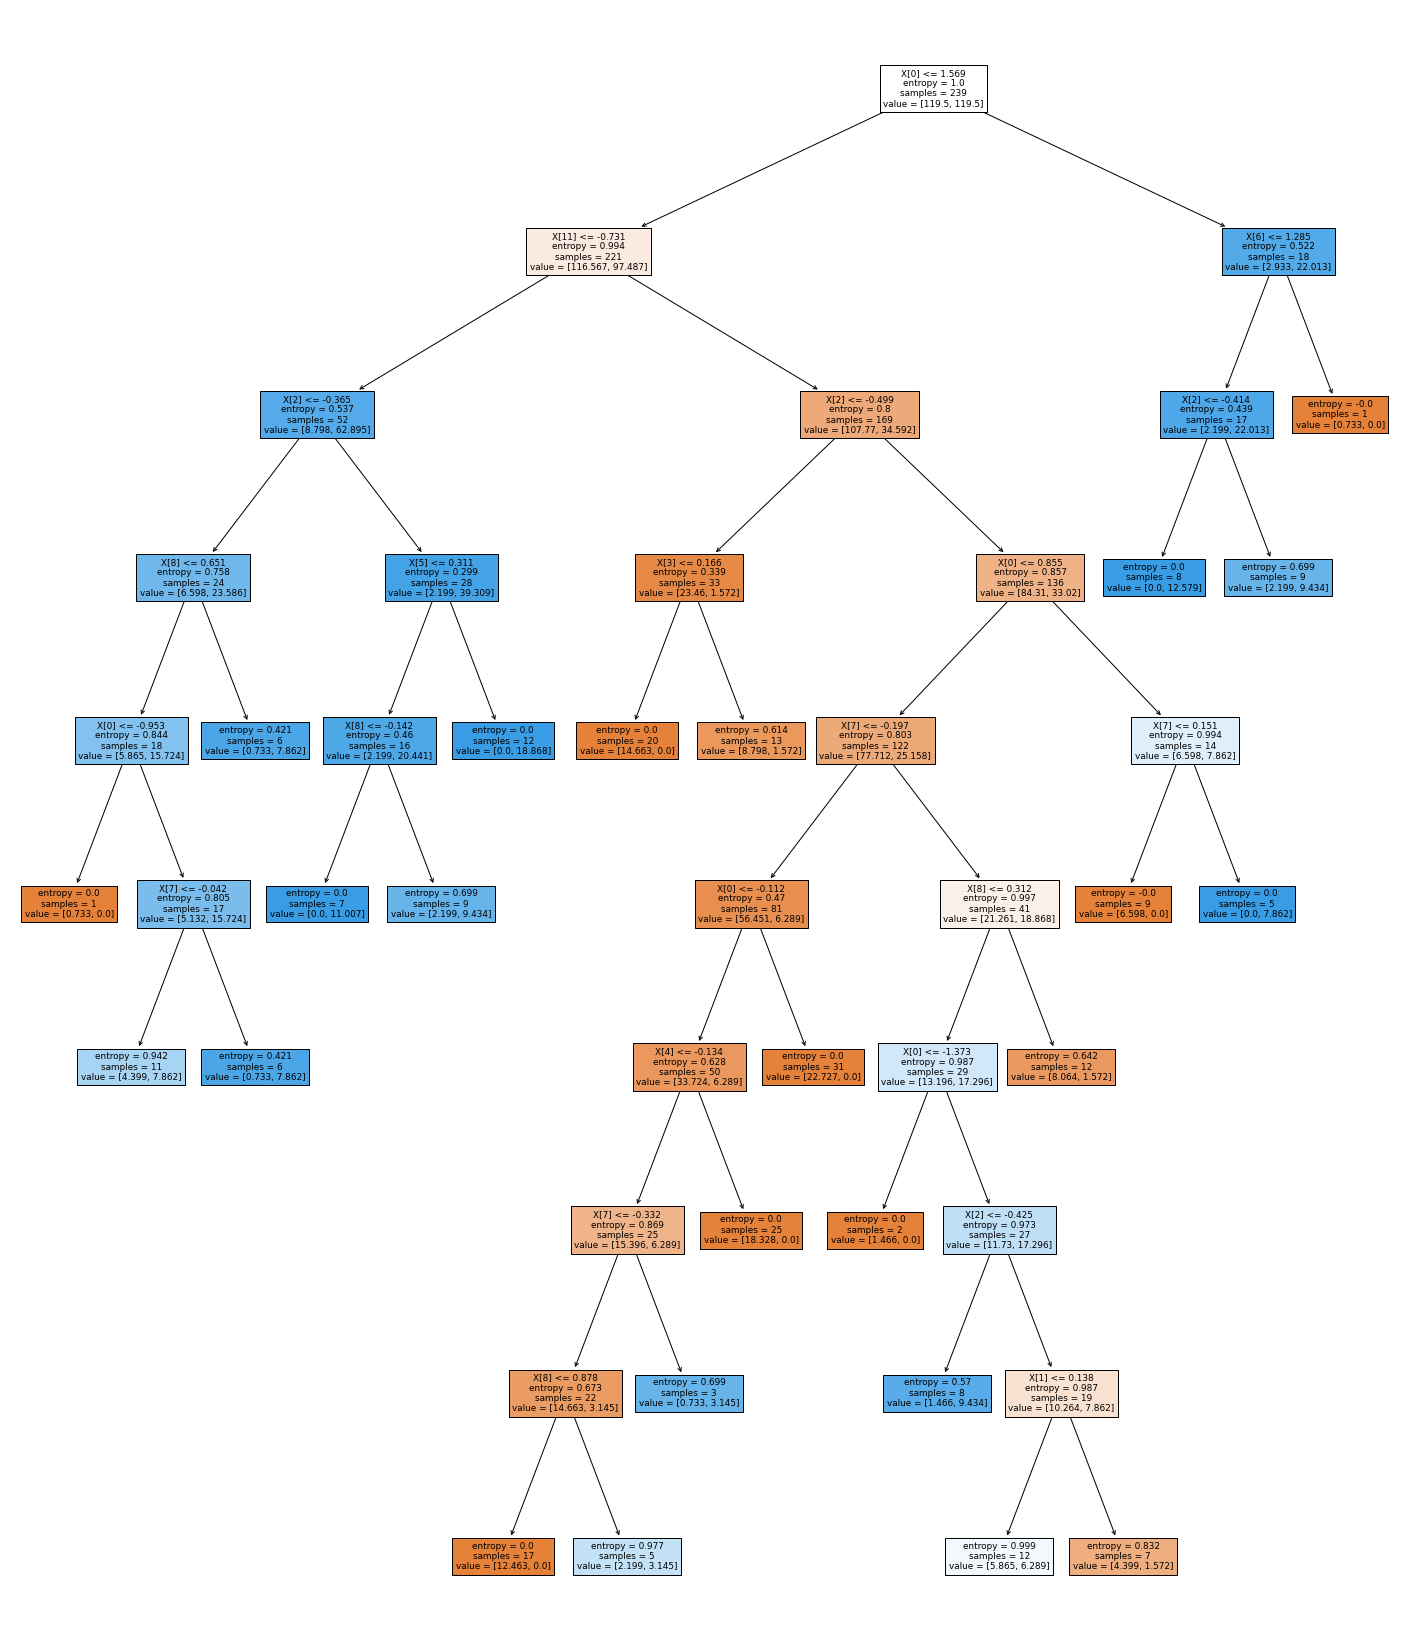

In [ ]:
plt.figure(figsize=(25,30))
plot_tree(gs_dt.best_estimator_[0], filled=True)
plt.show()

## Configuration 2: Reduced dataset with PCA

Best grid scores on validation set:
0.596 (+/-0.161) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}


,predicted not death,predicted death
true not death,0.625,0.375
true death,0.250,0.750


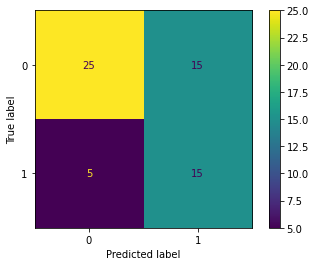

In [ ]:
gs_dt_pca, cf_dt_pca =apply_model(DecisionTreeClassifier(random_state=SEED, class_weight="balanced"), DECISION_TREE_PARAMS, X_train_pca, Y_train, X_test_pca, Y_test)
print_grid_search_result(gs_dt_pca)
cf_dt_pca

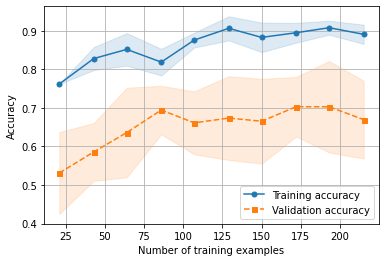

In [ ]:
print_learning_curve(gs_dt.best_estimator_,X_train_pca, Y_train)

In [ ]:
#does it have sense?
#feature_importance = np.array(sorted(zip(X_train_pca, gs_dt_pca.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
#plot_feature_importance(feature_importance, "Feature importance in the decision tree")

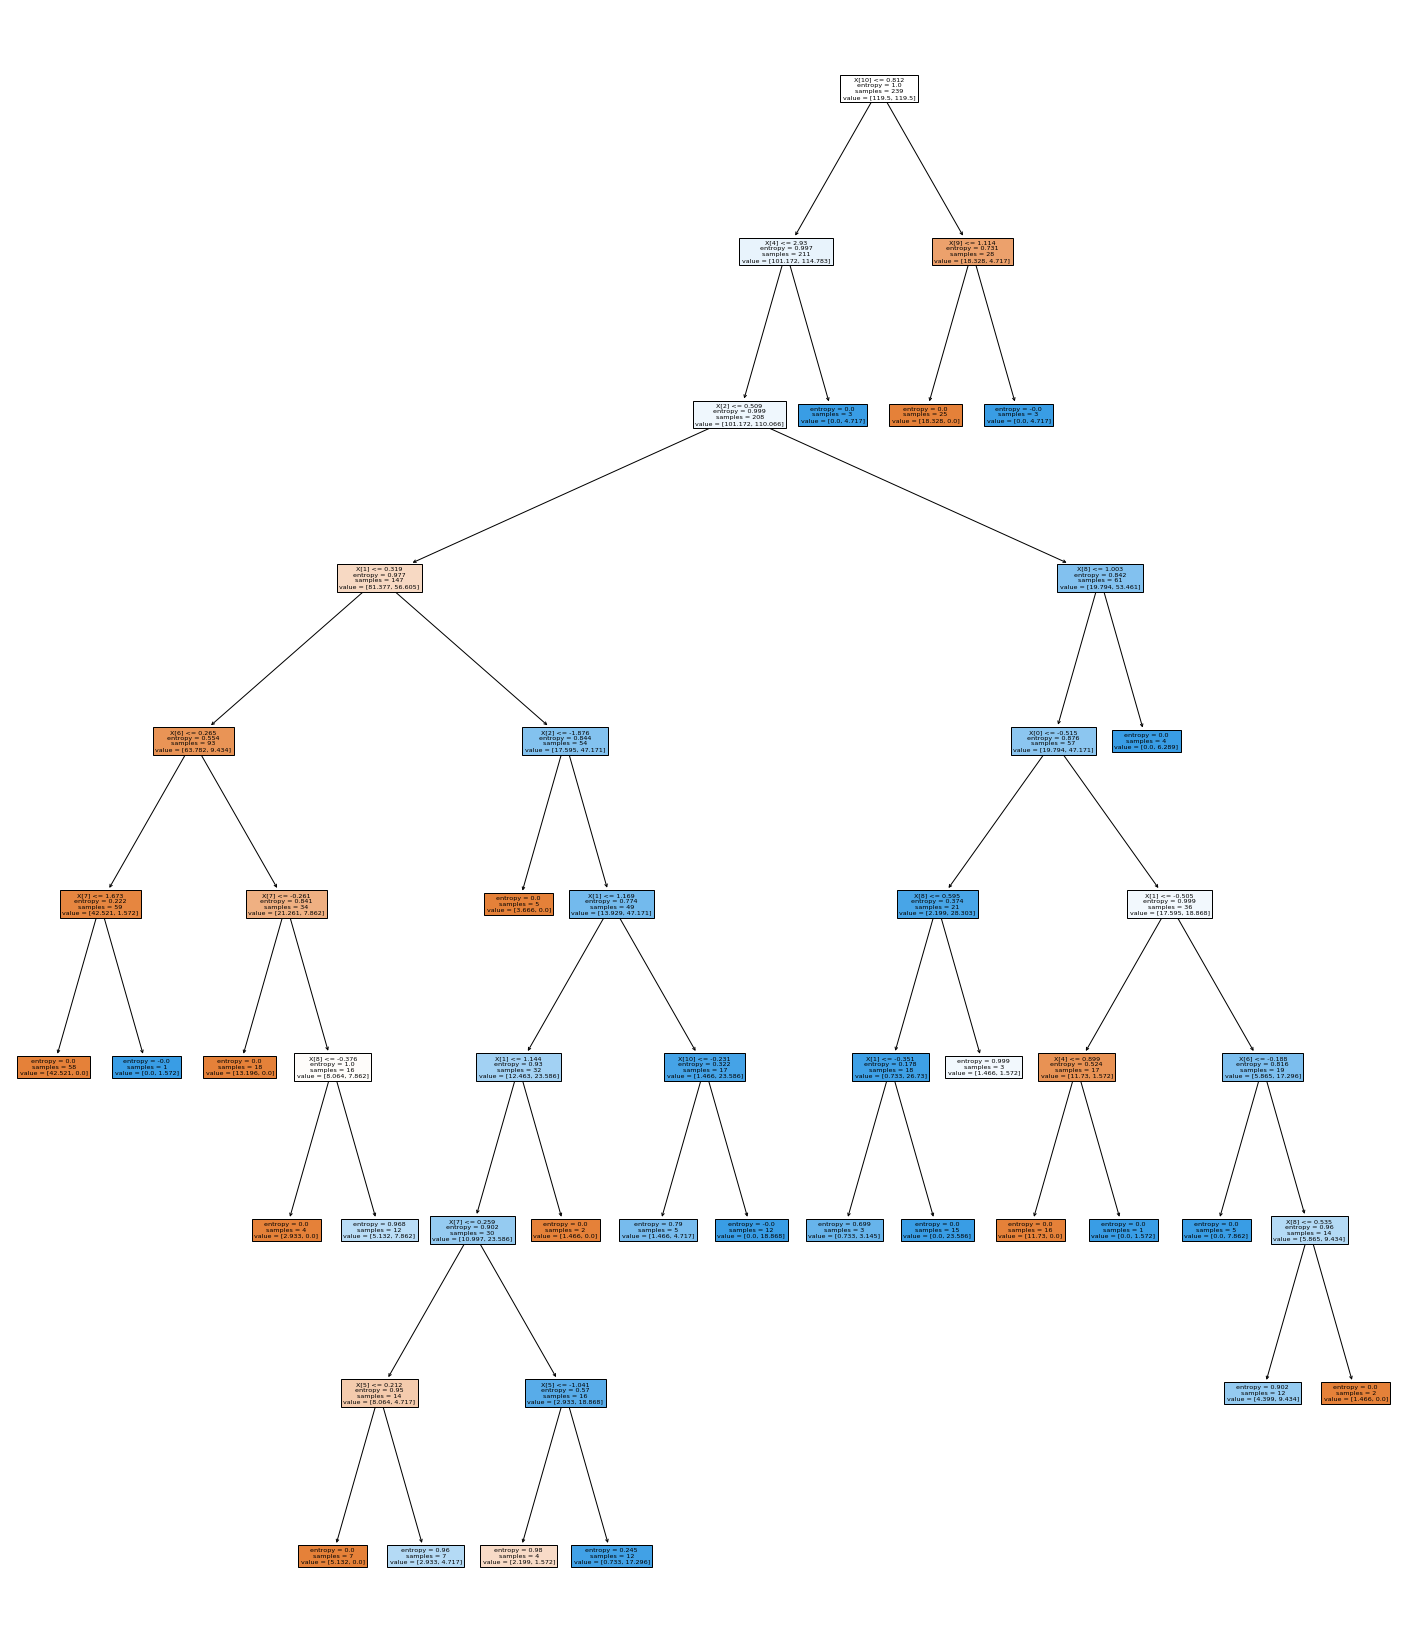

In [ ]:
plt.figure(figsize=(25,30))
plot_tree(gs_dt_pca.best_estimator_[0], filled=True)
plt.show()

## Configuration 3: Reduced dataset with undersampling

Best grid scores on validation set:
0.783 (+/-0.199) for {'clf__criterion': 'gini', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}


,predicted not death,predicted death
true not death,0.684,0.316
true death,0.500,0.500


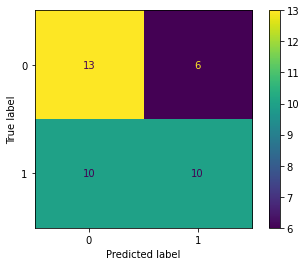

In [ ]:
gs_dt_balanced, cf_dt_balanced =apply_model(DecisionTreeClassifier(random_state=SEED), DECISION_TREE_PARAMS, X_train_balanced, Y_train_balanced, X_test_balanced, Y_test_balanced)
print_grid_search_result(gs_dt_balanced)
cf_dt_balanced

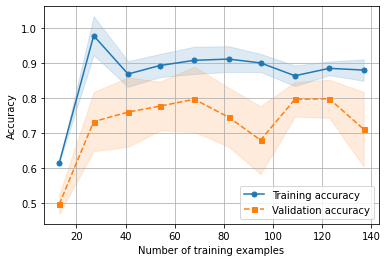

In [ ]:
print_learning_curve(gs_dt_balanced.best_estimator_,X_train_balanced, Y_train_balanced)

In [ ]:
feature_importance = np.array(sorted(zip(X_train.columns, gs_dt_balanced.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

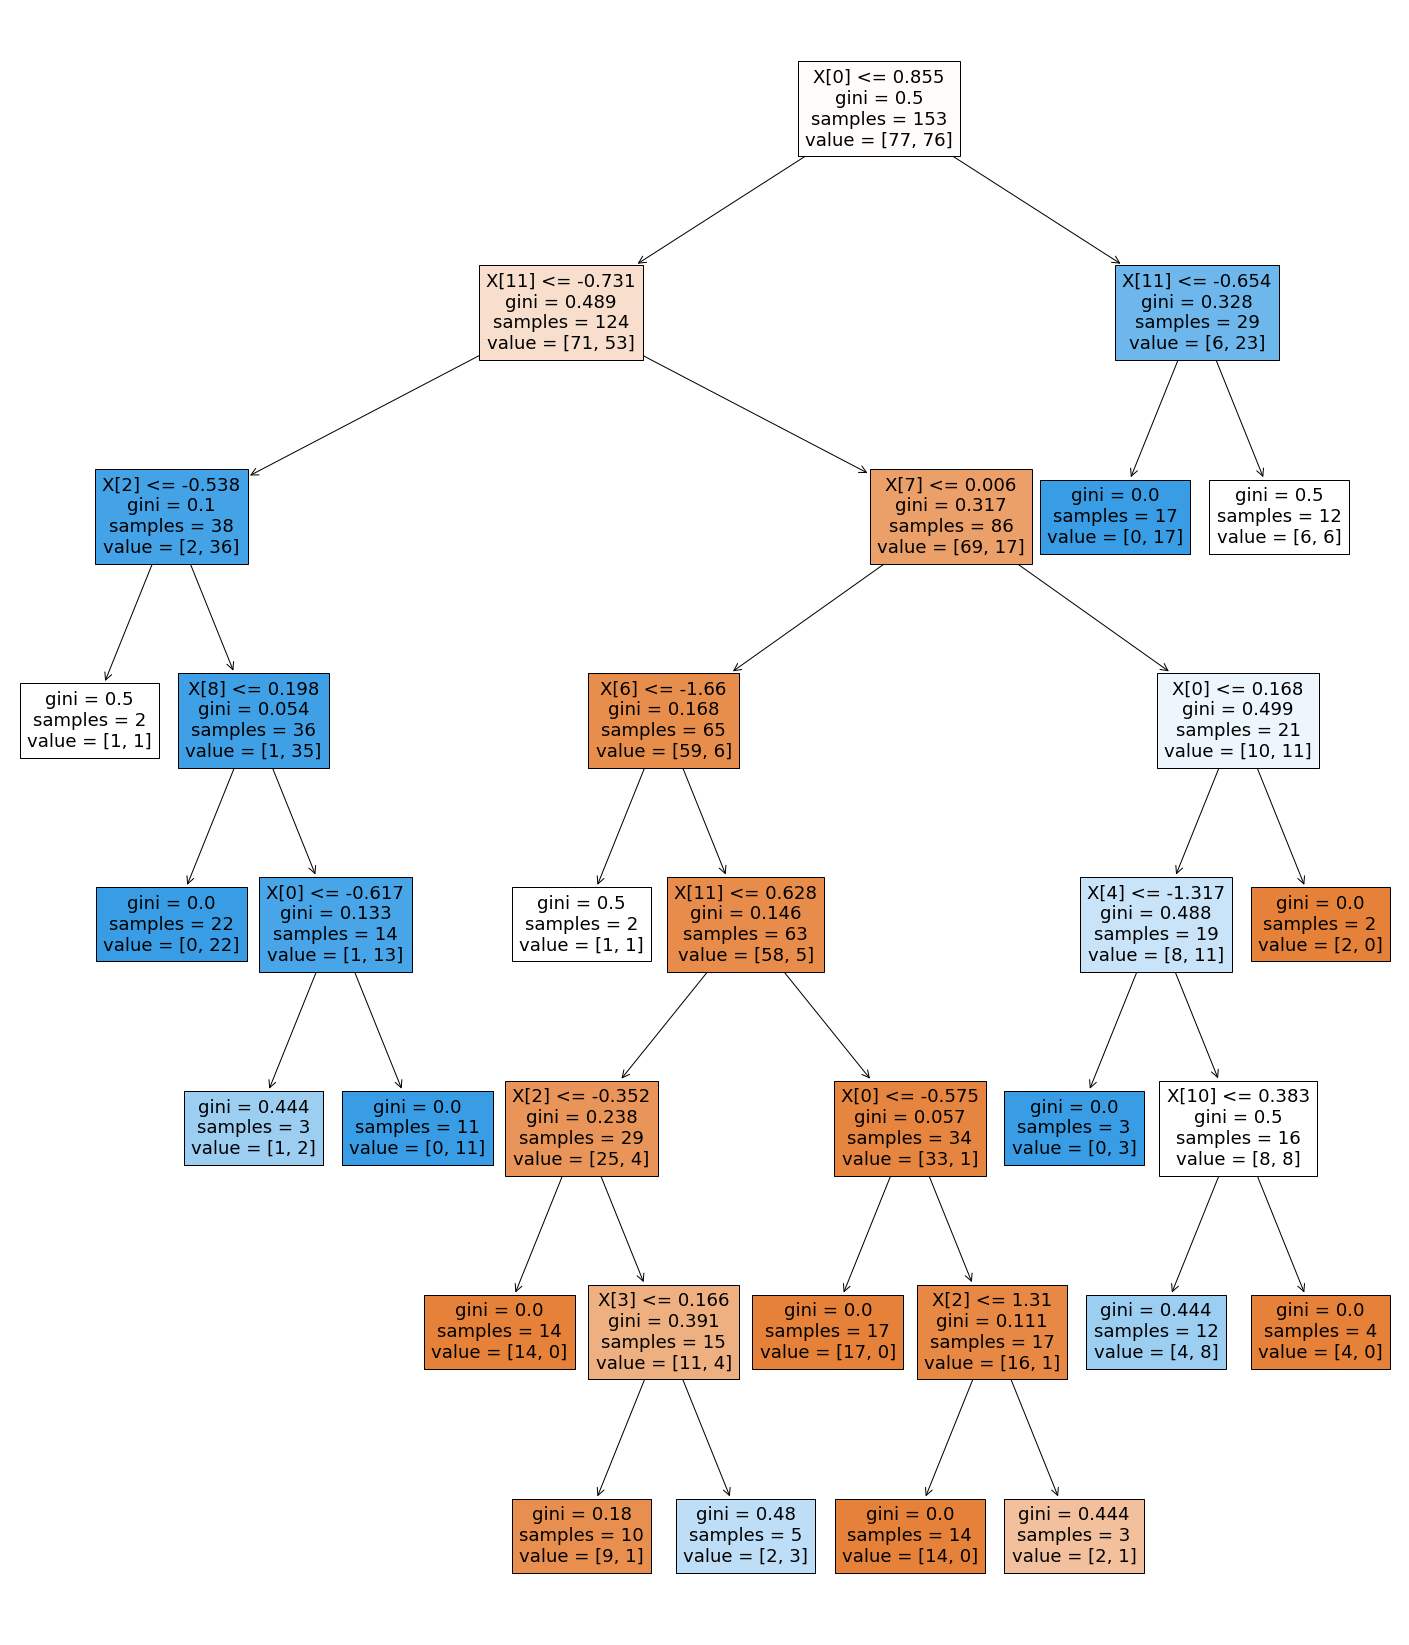

In [ ]:
plt.figure(figsize=(25,30))
plot_tree(gs_dt_balanced.best_estimator_[0], filled=True)
plt.show()

## Configuration 4: SMOTE

smote
Best grid scores on validation set:
0.616 (+/-0.292) for {'clf__criterion': 'gini', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 6}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



,predicted not death,predicted death
true not death,0.825,0.175
true death,0.250,0.750


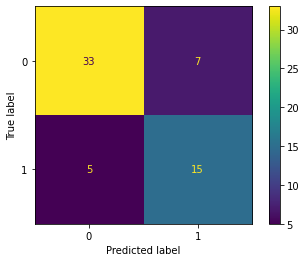

In [ ]:
gs_dt_sm, cf_dt_sm =apply_model(DecisionTreeClassifier(random_state=SEED), DECISION_TREE_PARAMS, X_train, Y_train, X_test, Y_test, smote=True)
print_grid_search_result(gs_dt_sm)
cf_dt_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

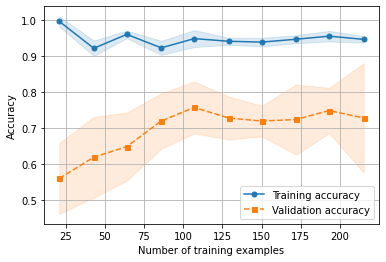

In [ ]:
print_learning_curve(gs_dt_sm.best_estimator_,X_train, Y_train)

In [ ]:
feature_importance = np.array(sorted(zip(X_train.columns, gs_dt_sm.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

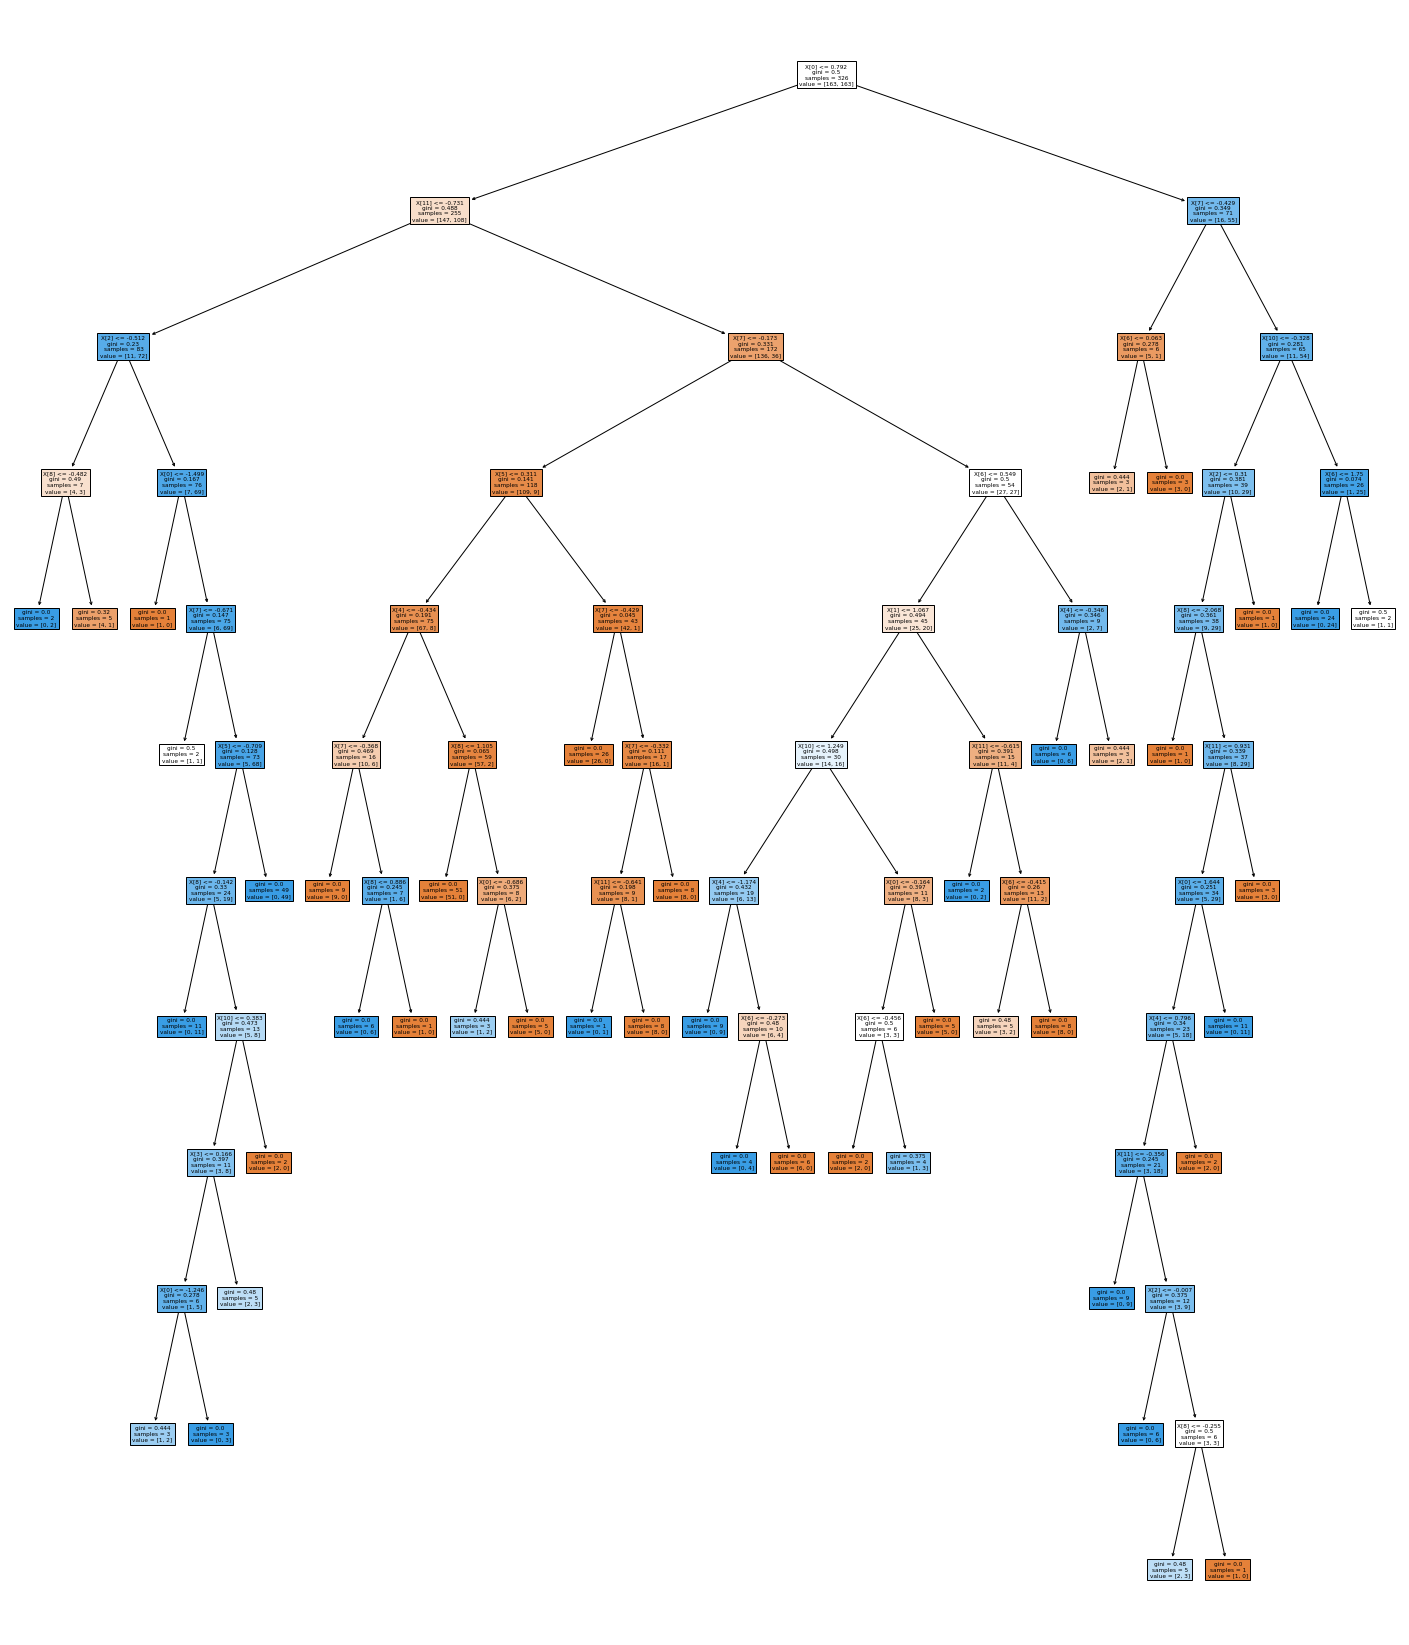

In [ ]:
plt.figure(figsize=(25,30))
plot_tree(gs_dt_sm.best_estimator_[1], filled=True)
plt.show()

# Random forest

In [ ]:
RANDOM_FOREST_PARAMS = {
    'clf__max_depth': [25, 50, 75],
    'clf__max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19) 
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [100, 300, 500, 1000]
}

## Configuration 1: full dataset

Best grid scores on validation set:
0.741 (+/-0.179) for {'clf__criterion': 'gini', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}


,predicted not death,predicted death
true not death,0.95,0.05
true death,0.35,0.65


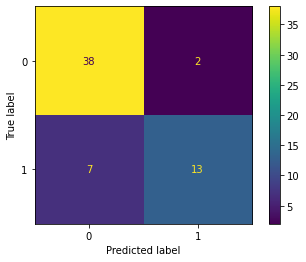

In [ ]:
gs_rf, cf_rf = apply_model(RandomForestClassifier(random_state=SEED, class_weight="balanced"), RANDOM_FOREST_PARAMS, X_train, Y_train, X_test, Y_test)
print_grid_search_result(gs_rf)
cf_rf

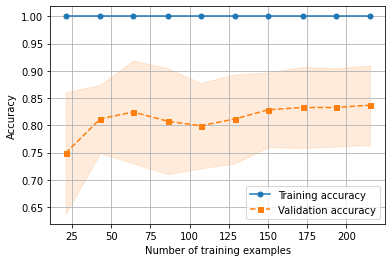

In [ ]:
print_learning_curve(gs_rf.best_estimator_,X_train, Y_train)

In [ ]:
feature_importance = np.array(sorted(zip(X_train.columns, gs_rf.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

## Configuration 2: Reduced dataset with PCA

Best grid scores on validation set:
0.560 (+/-0.132) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}


,predicted not death,predicted death
true not death,0.85,0.15
true death,0.40,0.60


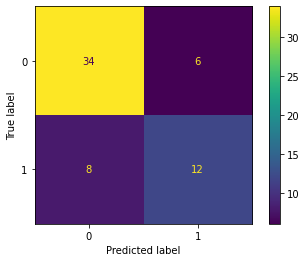

In [ ]:
gs_rf_pca, cf_rf_pca = apply_model(RandomForestClassifier(random_state=SEED, class_weight="balanced"), RANDOM_FOREST_PARAMS, X_train_pca, Y_train, X_test_pca, Y_test)
print_grid_search_result(gs_rf_pca)
cf_rf_pca

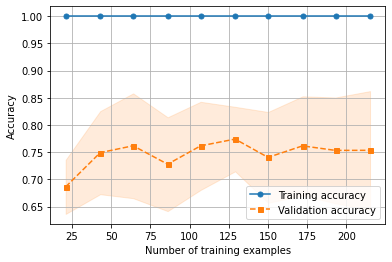

In [ ]:
print_learning_curve(gs_rf_pca.best_estimator_,X_train_pca, Y_train)

In [ ]:
#feature_importance = np.array(sorted(zip(X_train_pca, gs_rf_pca.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
#plot_feature_importance(feature_importance, "Feature importance in the decision tree")

## Configuration 3: Reduced dataset with undersampling

Best grid scores on validation set:
0.821 (+/-0.107) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}


,predicted not death,predicted death
true not death,0.632,0.368
true death,0.250,0.750


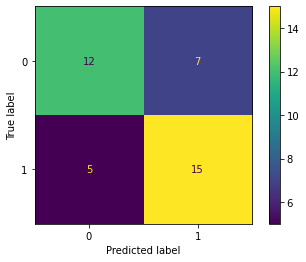

In [ ]:
gs_rf_balanced, cf_rf_balanced = apply_model(RandomForestClassifier(random_state=SEED), RANDOM_FOREST_PARAMS, X_train_balanced, Y_train_balanced, X_test_balanced, Y_test_balanced)
print_grid_search_result(gs_rf_balanced)
cf_rf_balanced

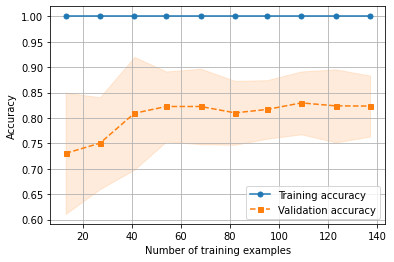

In [ ]:
print_learning_curve(gs_rf_balanced.best_estimator_,X_train_balanced, Y_train_balanced)

In [ ]:
feature_importance = np.array(sorted(zip(X_train_balanced.columns, gs_rf_balanced.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

## Configuration 4: SMOTE

smote


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Best grid scores on validation set:
0.779 (+/-0.166) for {'clf__criterion': 'gini', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 1000}


,predicted not death,predicted death
true not death,0.90,0.10
true death,0.35,0.65


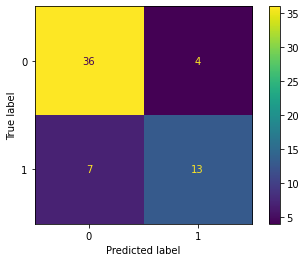

In [ ]:
gs_rf_sm, cf_rf_sm = apply_model(RandomForestClassifier(random_state=SEED), RANDOM_FOREST_PARAMS, X_train, Y_train, X_test, Y_test, smote=True)
print_grid_search_result(gs_rf_sm)
cf_rf_sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

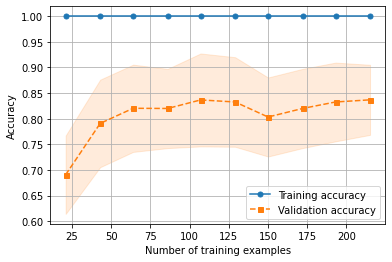

In [ ]:
print_learning_curve(gs_rf_sm.best_estimator_,X_train, Y_train)

In [ ]:
feature_importance = np.array(sorted(zip(X_train.columns, gs_rf_sm.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

# ROC Curve

In [ ]:
# code partially from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifiers, legend, title, X_test, y_test):
    fig_ROC=go.Figure()
    fig_ROC.add_trace(go.Scatter(
        x=[0, 1], 
        y=[0, 1], 
        showlegend=False,
        mode="lines",
        name="",
        line = dict(
            color = colors[0],
        ),
    ))
    
    
    aucs = []
    for clf, string, c in zip(classifiers, legend, colors[1:]):
        y_test_roc = np.array([([0, 1] if y else [1, 0]) for y in y_test])
        y_score = clf.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        aucs.append(roc_auc['micro'])

        fig_ROC.add_trace(go.Scatter(
            x=fpr['micro'], 
            y=tpr['micro'], 
            showlegend=True,
            mode="lines",
            name=string + " (area = %0.2f)" % roc_auc['micro'],
            hoverlabel = dict(
                namelength=30
            ),
            line = dict(
                color = c,
            ),
        ))

    layout = go.Layout(
        title=title,
        autosize=False,
        width=550,
        height=550,
        yaxis=dict(
            title='True Positive Rate',
        ),
        xaxis=dict(
            title="False Positive Rate",
        ),
        legend=dict(
            x=0.4,
            y=0.06,
        ),
    )
    fig_ROC.update_layout(layout,height=900, width=900,  font=dict(size=20))
    fig_ROC.show()
    return aucs


classifier_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]

## Configuration 1: full dataset

In [ ]:
classifiers = [gs_lr, gs_knn, gs_svm, gs_dt, gs_rf]
auc_scores = plot_roc_curve(classifiers, classifier_names, "ROC curve", X_test, Y_test)


## Configuration 2: Reduced dataset with PCA

In [ ]:
classifiers_pca = [gs_lr_pca, gs_knn_pca, gs_svm_pca, gs_dt_pca, gs_rf_pca]
auc_scores_pca = plot_roc_curve(classifiers_pca, classifier_names, "ROC curve", X_test_pca, Y_test)


##Configuration 3: Reduced dataset with undersampling


In [ ]:
classifiers_balanced = [gs_lr_balanced, gs_knn_balanced, gs_svm_balanced, gs_dt_balanced, gs_rf_balanced]
auc_scores_balanced = plot_roc_curve(classifiers_balanced, classifier_names, "ROC curve", X_test_balanced, Y_test_balanced)


## Configuration 4: SMOTE

In [ ]:
classifiers_sm = [gs_lr_sm, gs_knn_sm, gs_svm_sm, gs_dt_sm, gs_rf_sm]
auc_scores_sm = plot_roc_curve(classifiers_balanced, classifier_names, "ROC curve", X_test, Y_test)

# Comparison
Compare accuracy, precision, recall and f1-score on test set for each classifier

In [ ]:
def compare_classifiers( classifiers, auc_scores, X_test, y_test, classifier_names=classifier_names):
  accs = []
  recalls = []
  precision = []
  results_table = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1", "auc"])
  for (i, clf), name, auc in zip(enumerate(classifiers), classifier_names, auc_scores):
      y_pred = clf.predict(X_test)
      row = []
      row.append(accuracy_score(y_test, y_pred))
      row.append(precision_score(y_test, y_pred))
      row.append(recall_score(y_test, y_pred))
      row.append(f1_score(y_test, y_pred))
      row.append(auc)
      row = ["%.3f" % r for r in row]
      results_table.loc[name] = row
  return results_table

## Configuration 1: full dataset

In [ ]:
results_1=compare_classifiers(classifiers,auc_scores, X_test, Y_test)
results_1

,accuracy,precision,recall,f1,auc
Logistic Regression,0.717,0.560,0.700,0.622,0.802
KNN,0.733,0.750,0.300,0.429,0.776
SVM,0.767,0.650,0.650,0.650,0.809
Decision Tree,0.800,0.682,0.750,0.714,0.892
Random Forest,0.850,0.867,0.650,0.743,0.899


## Configuration 2: Reduced Dataset with PCA

In [ ]:
results_2=compare_classifiers(classifiers_pca,auc_scores_pca, X_test_pca, Y_test)
results_2

,accuracy,precision,recall,f1,auc
Logistic Regression,0.700,0.538,0.700,0.609,0.801
KNN,0.767,0.800,0.400,0.533,0.793
SVM,0.767,0.650,0.650,0.650,0.809
Decision Tree,0.667,0.500,0.750,0.600,0.700
Random Forest,0.767,0.667,0.600,0.632,0.838


##Configuration 3: Reduced dataset with undersampling

In [ ]:
results_3=compare_classifiers(classifiers_balanced,auc_scores_balanced, X_test_balanced, Y_test_balanced)
results_3

,accuracy,precision,recall,f1,auc
Logistic Regression,0.667,0.684,0.650,0.667,0.797
KNN,0.744,0.812,0.650,0.722,0.776
SVM,0.641,0.688,0.550,0.611,0.766
Decision Tree,0.590,0.625,0.500,0.556,0.710
Random Forest,0.692,0.682,0.750,0.714,0.785


## Configuration 4: SMOTE

In [ ]:
results_4=compare_classifiers(classifiers_sm,auc_scores_sm, X_test, Y_test)
results_4

,accuracy,precision,recall,f1,auc
Logistic Regression,0.700,0.538,0.700,0.609,0.829
KNN,0.617,0.448,0.650,0.531,0.966
SVM,0.667,0.500,0.650,0.565,0.832
Decision Tree,0.800,0.682,0.750,0.714,0.858
Random Forest,0.817,0.765,0.650,0.703,0.982
